# Model Notebook
*Animal Recognition for self-driving cars*

## Import Libraries and Dataset

- Training and Test datasets loaded from tensorflow:
    * X train shape: (50000, 32, 32, 3)
    * y train shape: (50000, 1)
    * X test shape: (10000, 32, 32, 3)
    * y test shape: (10000, 1)

In [6]:
# If you are running this code on Google Colab, run this:

!git clone https://github.com/Silvano315/Animal-Recognition-for-Self-Driving-Cars.git

%cd Animal-Recognition-for-Self-Driving-Cars
%pwd

fatal: destination path 'Animal-Recognition-for-Self-Driving-Cars' already exists and is not an empty directory.
[Errno 2] No such file or directory: '{Animal-Recognition-for-Self-Driving-Cars}'
/content


'/content'

In [1]:
#say no to warnings!

import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import keras
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
# Import libraries

import os
import sys
import platform

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from src.constants import LABELS, BINARY_LABELS, SEED, BATCH_SIZE, INPUT_SHAPE
from src.viz_fx import images_viz, class_distribution, hisogram_distributions
from src.preprocessing import data_gen, viz_images_generator, norm_X, binary_y, train_splitting, apply_data_gen

In [5]:
# Import CIFAR10 dataset

(X_train, y_train), (X_test, y_test) = load_data()

print("="*40)
print("Training information:")
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print("="*40)
print("Test information:")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")
print("="*40)

Training information:
X train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
Test information:
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


In [6]:
# Flatten for y train and test so to have 1D array

y_train = y_train.flatten()
y_test = y_test.flatten()

print("="*40)
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")
print("="*40)

y train shape: (50000,)
y test shape: (10000,)


## Exploratory Data Analysis (EDA)

1. Visualize training and test contents
2. Check for Max and Min values for X_train and X_test
3. Images visualization for training and test sets
4. Class distribution in training and test
5. Image histogram distribution with KDE for each channel

In [ ]:
# Visualize training and test contents

instance = 0

print("="*80)
print("X train and test:")
print(f"- Type of X train and test: {type(X_train)}, {type(X_test)}")
print(f"- Part of the X train content for element {instance}: \n{X_train[instance,0,0:5,]}")
print(f"- Part of the X test content for element {instance}: \n{X_test[instance,0,0:5,]}")
print("="*80)
print("y train and test:")
print(f"- Type of y train and test: {type(y_train)}, {type(y_test)}")
print(f"- y train has these unique values: \n{np.unique(y_train)}")
print(f"- y test has these unique values: \n{np.unique(y_test)}")
print("="*80)

X train and test:
- Type of X train and test: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
- Part of the X train content for element 0: 
[[59 62 63]
 [43 46 45]
 [50 48 43]
 [68 54 42]
 [98 73 52]]
- Part of the X test content for element 0: 
[[158 112  49]
 [159 111  47]
 [165 116  51]
 [166 118  53]
 [160 112  46]]
y train and test:
- Type of y train and test: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
- y train has these unique values: 
[0 1 2 3 4 5 6 7 8 9]
- y test has these unique values: 
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Max and Min values for X_train and X_test

print("="*50)
print(f"Min and Max values for X train: {np.min(X_train)}, {np.max(X_train)}")
print(f"Min and Max values for X train: {np.min(X_test)}, {np.max(X_test)}")
print("="*50)

Min and Max values for X train: 0, 255
Min and Max values for X train: 0, 255


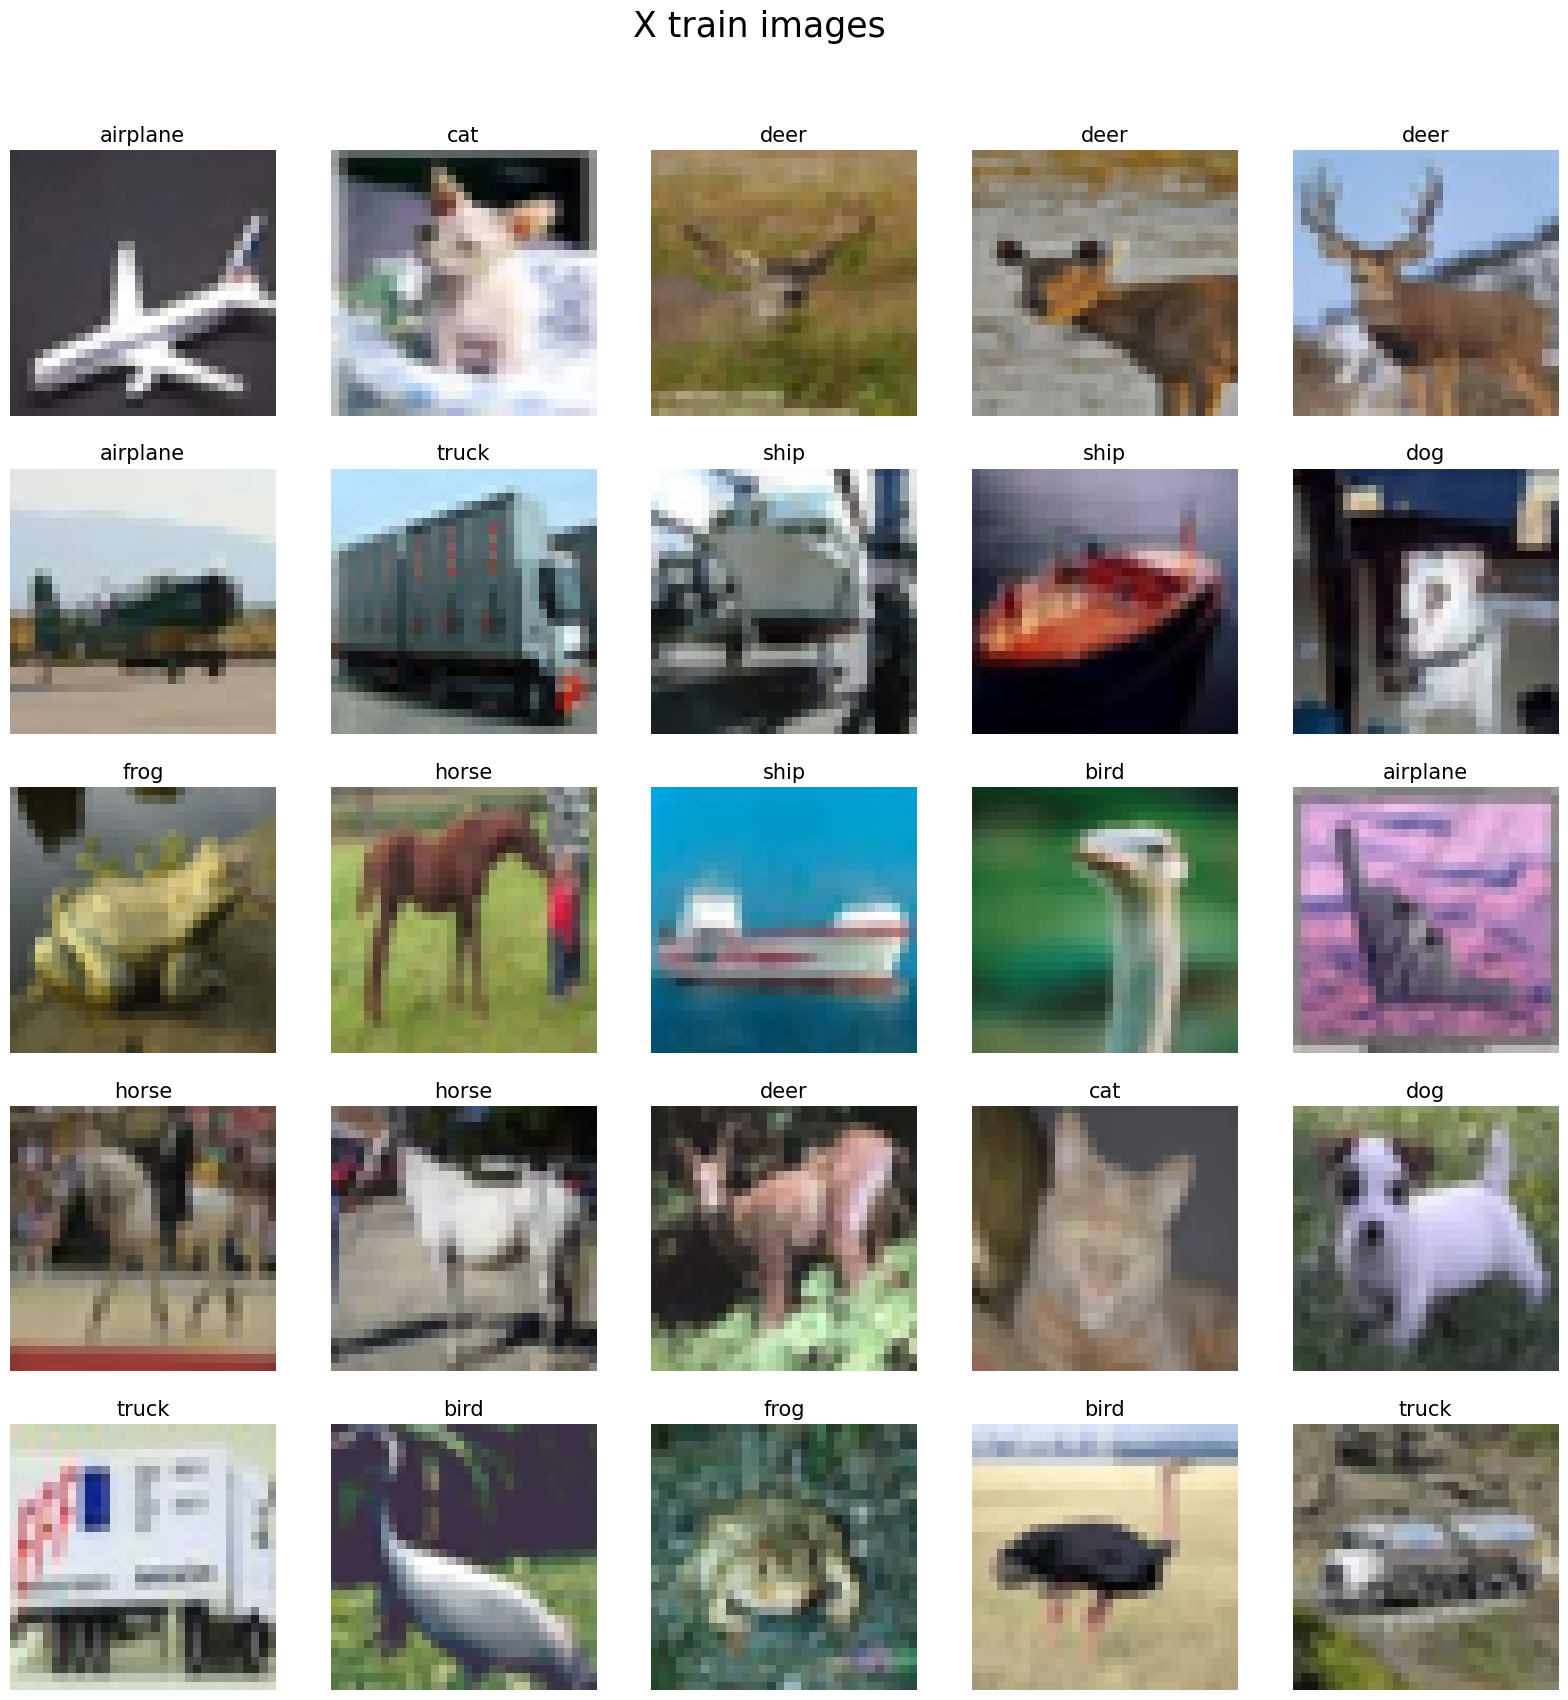

In [ ]:
# Images visualization for training

n_rows = 5
n_cols = 5
n_train = len(X_train)

images_viz(n_rows, n_cols, n_train, X_train, y_train, set = 'train')

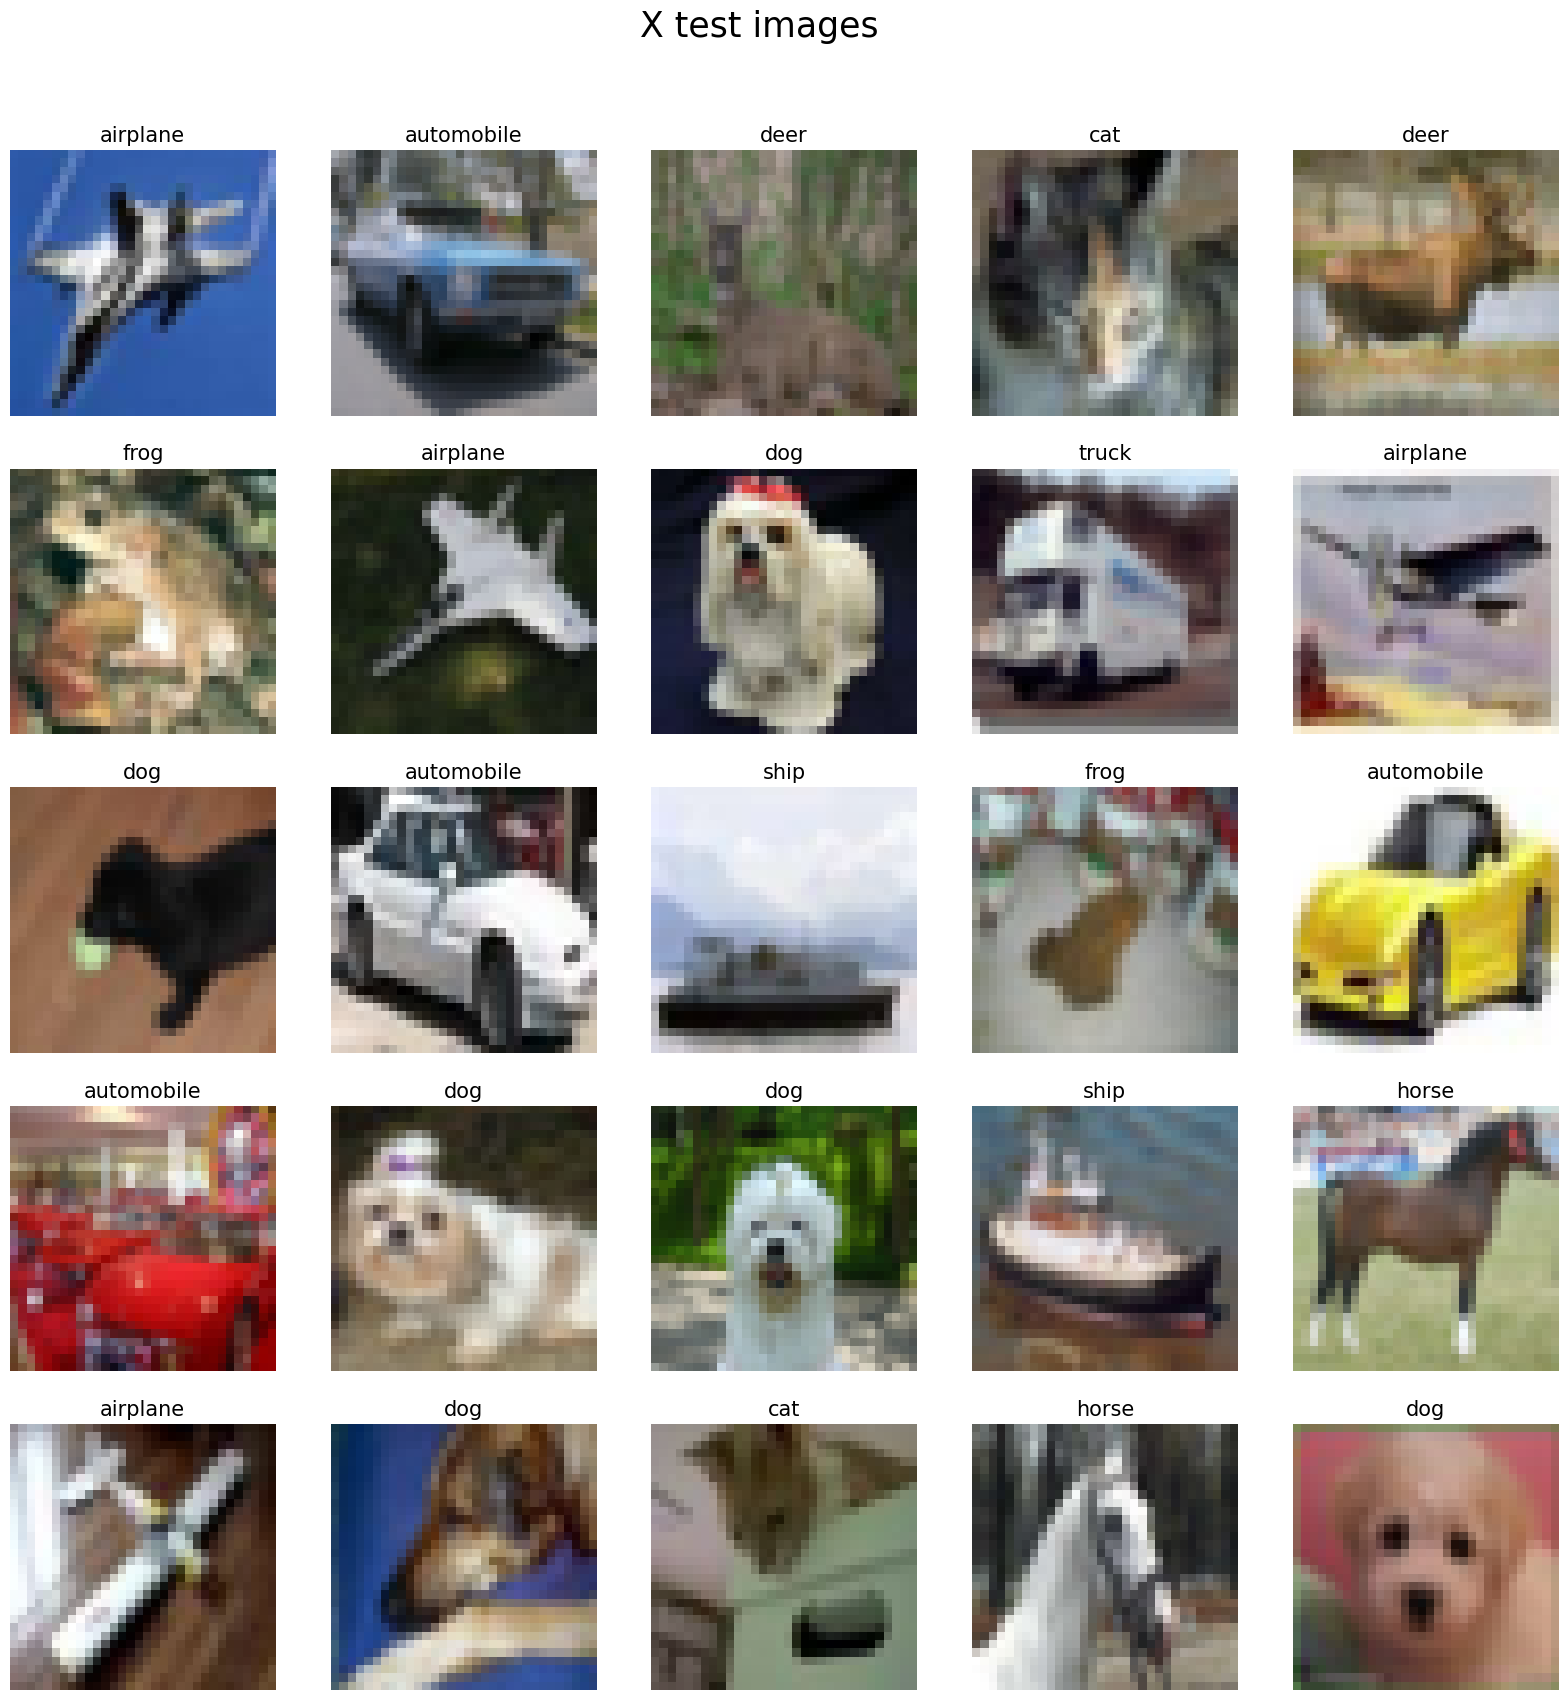

In [ ]:
# Images visualization for test

n_rows = 5
n_col = 5
n_test = len(X_test)

images_viz(n_rows, n_cols, n_test, X_test, y_test, set = 'test')

In [ ]:
# Class distribution in training and test

class_distribution(y_train, y_test)

In [ ]:
# Image histogram distribution with KDE for each channel

instance = 50

hisogram_distributions(instance, X_train)

## Preprocessing

1. Define and Visualize Data Augmentation
2. Normalization dividing by 255
3. Transform y labels to binary labels: vehicles (0) and animals (1)
4. Splitting Training set into train and validation
5. Apply Data Augumentation

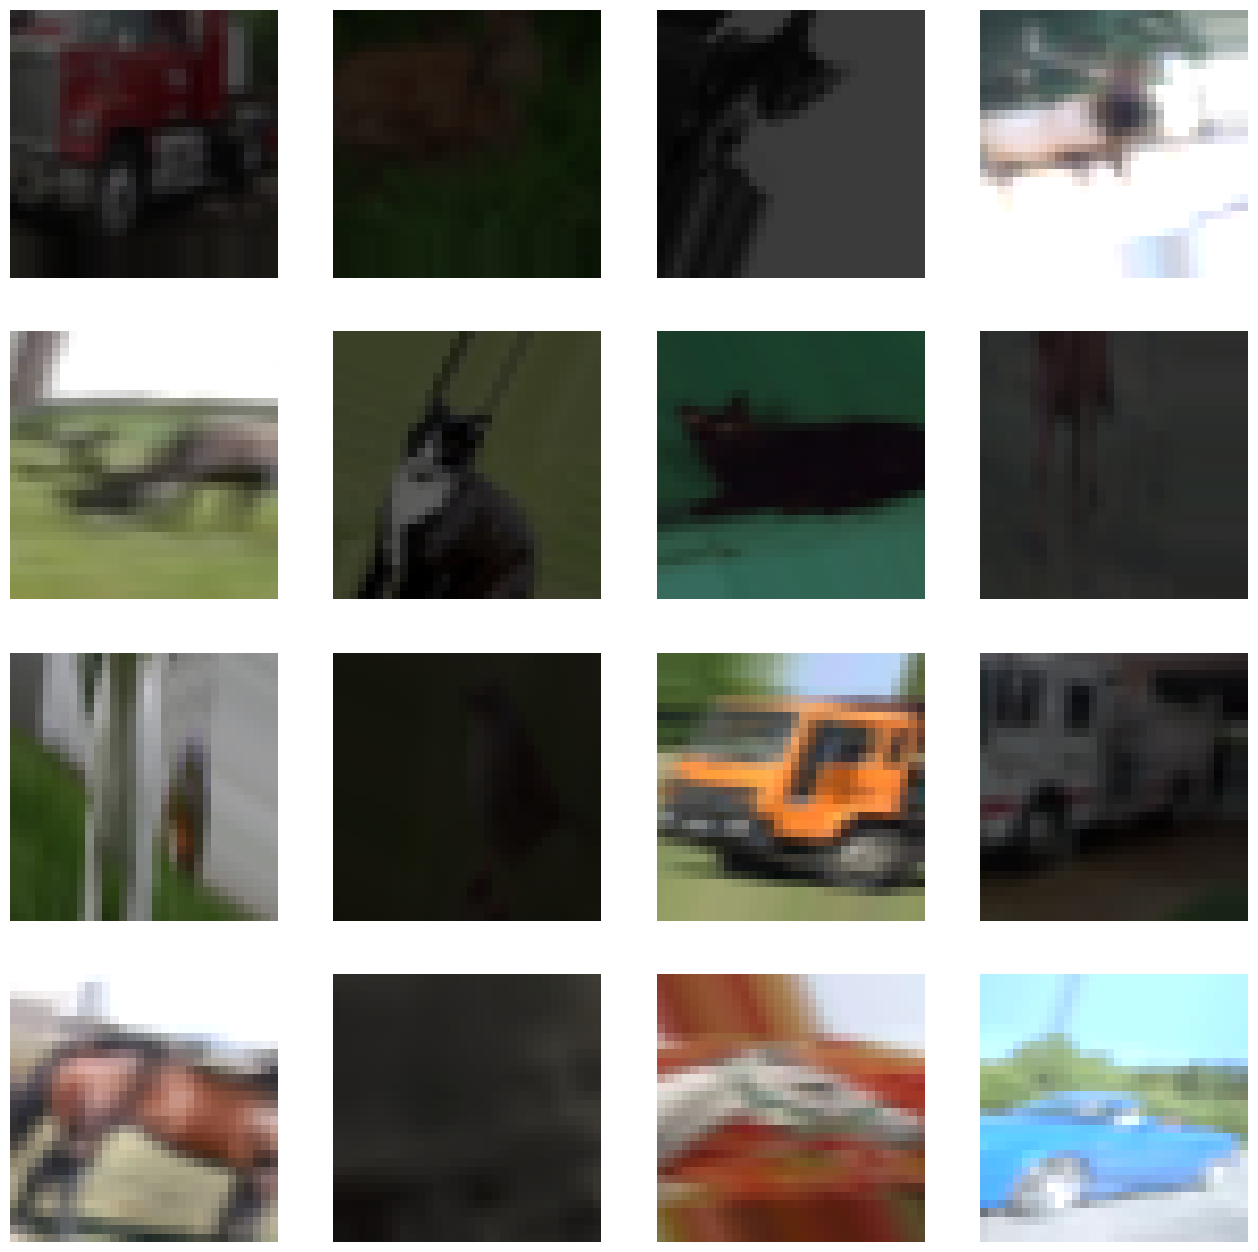

In [7]:
# Define and Visualize Data Augmentation

train_datagen, test_datagen = data_gen()

viz_images_generator(train_datagen, X_train)

In [8]:
# Normalization dividing by 255

X_train_norm, X_test_norm = norm_X(X_train, X_test)

Min and Max values for X train: 0.0, 1.0
Min and Max values for X train: 0.0, 1.0


In [9]:
# Transform y labels to binary labels: vehicles (0) and animals (1)

y_train_binary, y_test_binary = binary_y(y_train, y_test)

First 10 binary labels for training set: 
[1 0 0 1 0 0 1 1 0 1]
['frog' 'truck' 'truck' 'deer' 'automobile' 'automobile' 'bird' 'horse'
 'ship' 'cat']
First 10 binary labels for test set: 
[1 0 0 0 1 1 0 1 1 0]
['cat' 'ship' 'ship' 'airplane' 'frog' 'frog' 'automobile' 'frog' 'cat'
 'automobile']


In [10]:
# Splitting Training set into train and validation

X_train_split, X_val, y_train_binary_split, y_val_binary = train_splitting(X_train_norm, y_train_binary, test_size=0.1)

Training information:
X train percentage for training after splitting: 90%
X train shape after splitting: (45000, 32, 32, 3)
y train shape after splitting: (45000,)
Validation information:
X train percentage for validation after splitting: 10%
X val shape after splitting: (5000, 32, 32, 3)
y val shape after splitting: (5000,)


In [11]:
# Apply Data Augumentation

train_generator, val_generator = apply_data_gen(train_datagen, X_train_split, y_train_binary_split,
                                                test_datagen, X_val, y_val_binary)

## Convolutional Neural Network (CNN) from scratch

In [18]:
# Building a CNN model

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, BatchNormalization, Dropout, Conv2D, Flatten,\
                                         GlobalAveragePooling2D
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

clear_session()


model = Sequential()
model.add(Input(
    shape = INPUT_SHAPE, batch_size = BATCH_SIZE, name = "Input Layer"
))
model.add(Conv2D(
    filters = 16, kernel_size = (3,3), strides = (1,1), kernel_initializer = initializers.GlorotUniform,
    padding = "same", activation = 'relu', name = "block1_conv1"
))
#model.add(BatchNormalization())
model.add(Conv2D(
    filters = 16, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu', name = "block1_conv2"
))
#model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size=(2,2), strides = None, padding = "valid", name = "block1_maxpool"
))
model.add(BatchNormalization())
#model.add(Dropout())
model.add(Conv2D(
    filters = 32, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu', name = "block2_conv1"
))
#model.add(BatchNormalization())
model.add(Conv2D(
    filters = 32, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu', name = "block2_conv2"
))
#model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size=(2,2), strides = None, padding = "valid", name = "block2_maxpool"
))
model.add(BatchNormalization())
#model.add(Dropout())
model.add(Conv2D(
    filters = 64, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu', name = "block3_conv1"
))
#model.add(BatchNormalization())
model.add(Conv2D(
    filters = 64, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu', name = "block3_conv2"
))
#model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size=(2,2), strides = None, padding = "valid", name = "block3_maxpool"
))
model.add(BatchNormalization())
#model.add(Dropout())
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(
    units = 128, activation = 'relu'
))
model.add(Dense(
    units = 128, activation = 'relu'
))
model.add(Dropout(0.2))
model.add(Dense(
    units = 1, activation = 'sigmoid'
))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (32, 32, 32, 16)            │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (32, 32, 32, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_maxpool (MaxPooling2D)        │ (32, 16, 16, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (32, 16, 16, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (32, 16, 16, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (32, 16, 16, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_maxpool (MaxPooling2D)        │ (32, 8, 8, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 8, 8, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (32, 8, 8, 64)              │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (32, 8, 8, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_maxpool (MaxPooling2D)        │ (32, 4, 4, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 4, 4, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (32, 64)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 128)                   │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,489 (380.82 KB)

 Trainable params: 97,265 (379.94 KB)

 Non-trainable params: 224 (896.00 B)

In [40]:
# (kernel_W * kernel_H * Input_Channels + 1) * Num_Filters
(3*3*3+1)*20, (3*3*20+1)*20

(560, 3620)

In [19]:
# Compile model

adam_opt = Adam(learning_rate = 0.001)

model.compile(loss='binary_crossentropy', optimizer=adam_opt, metrics=['accuracy'])

In [14]:
# Check you are usign GPU

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-6.1.85+-x86_64-with-glibc2.35
Tensor Flow Version: 2.17.0
Keras Version: 3.4.1

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
GPU is available


In [ ]:
epochs_step = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
callback = EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = val_generator,
    validation_steps = None,
    steps_per_epoch = None,
    #callbacks = [callback],
    verbose = 1
)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.6012 - loss: 0.6726 - val_accuracy: 0.6000 - val_loss: 0.6737
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.6040 - loss: 0.6717 - val_accuracy: 0.6000 - val_loss: 0.6755
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.6081 - loss: 0.6703 - val_accuracy: 0.6000 - val_loss: 0.6729
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.6088 - loss: 0.6699 - val_accuracy: 0.6000 - val_loss: 0.6738
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6058 - loss: 0.6709 - val_accuracy: 0.6000 - val_loss: 0.6715
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.6063 - loss: 0.6707 - val_accuracy: 0.5648 - val_loss: 0.6896
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.6045 - loss: 0.6715 - val_accuracy: 0.6000 - val_loss: 0.6729
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.5991 -

### Model Evaluation

## CNN Transfer Learning model

### Model Evaluation

## Results comparison